<a href="https://colab.research.google.com/github/aliahalotaibi73/week7_exercises/blob/main/auto_correction_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto-Correction Exercise

This exercise will guide you through building an auto-correct system in Python. Follow the instructions in each step to complete the implementation.

## Step 1: Import Libraries

Import the necessary libraries

In [40]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

## Step 2: Load Data

Load a trusted text corpus to build the auto-correct system.

In [41]:
# Load the corpus
with open('/content/book.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

## Step 3: Data Processing

Tokenize the text and convert all characters to lowercase to clean the data.

In [42]:
def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words

word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['ï', 'the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or', 'the']
There are 18663 unique words in the vocabulary.



## Step 4: Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Check if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggest candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculate the probability of each candidate word.
4. **Replace Mispells**: Replace the misspelled word with the most probable suggestion.

Implement each part step-by-step in the cells below.


### Step 4.1: Filtering Mispells

Write a function to identify words not present in the vocabulary.

In [62]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('hhe is goinng home', vocab)

['hhe', 'goinng']

### Step 4.2: Word Suggestion Mechanism

Implement functions to suggest words by deleting, switching, replacing, or inserting characters.

In [63]:
# Delete letter
def delete_letter(word, verbose=False):
    delete_l = []
    # split the word at every possible position
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="icon", verbose=True)

input word : icon 
split_l = [('', 'icon'), ('i', 'con'), ('ic', 'on'), ('ico', 'n')], 
delete_l = ['con', 'ion', 'icn', 'ico']


In [66]:
# Switch letter
def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="eta", verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [67]:
# Replace letter
def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='the', verbose=True)

Input word = the 
split_l = [('', 'the'), ('t', 'he'), ('th', 'e')] 
replace_l = ['ahe', 'bhe', 'che', 'dhe', 'ehe', 'fhe', 'ghe', 'hhe', 'ihe', 'jhe', 'khe', 'lhe', 'mhe', 'nhe', 'ohe', 'phe', 'qhe', 'rhe', 'she', 'tae', 'tbe', 'tce', 'tde', 'tee', 'tfe', 'tge', 'tha', 'thb', 'thc', 'thd', 'thf', 'thg', 'thh', 'thi', 'thj', 'thk', 'thl', 'thm', 'thn', 'tho', 'thp', 'thq', 'thr', 'ths', 'tht', 'thu', 'thv', 'thw', 'thx', 'thy', 'thz', 'tie', 'tje', 'tke', 'tle', 'tme', 'tne', 'toe', 'tpe', 'tqe', 'tre', 'tse', 'tte', 'tue', 'tve', 'twe', 'txe', 'tye', 'tze', 'uhe', 'vhe', 'whe', 'xhe', 'yhe', 'zhe']


In [69]:
# Insert letter
def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('us', True)
print(f"Number of strings output by insert_letter('us') is {len(insert_l)}")

Input word us 
split_l = [('', 'us'), ('u', 's'), ('us', '')] 
insert_l = ['aus', 'bus', 'cus', 'dus', 'eus', 'fus', 'gus', 'hus', 'ius', 'jus', 'kus', 'lus', 'mus', 'nus', 'ous', 'pus', 'qus', 'rus', 'sus', 'tus', 'uus', 'vus', 'wus', 'xus', 'yus', 'zus', 'uas', 'ubs', 'ucs', 'uds', 'ues', 'ufs', 'ugs', 'uhs', 'uis', 'ujs', 'uks', 'uls', 'ums', 'uns', 'uos', 'ups', 'uqs', 'urs', 'uss', 'uts', 'uus', 'uvs', 'uws', 'uxs', 'uys', 'uzs', 'usa', 'usb', 'usc', 'usd', 'use', 'usf', 'usg', 'ush', 'usi', 'usj', 'usk', 'usl', 'usm', 'usn', 'uso', 'usp', 'usq', 'usr', 'uss', 'ust', 'usu', 'usv', 'usw', 'usx', 'usy', 'usz']
Number of strings output by insert_letter('us') is 78


**Combining Functions for Word Suggestions**

Combine the functions to edit one or two characters in a word.

In [48]:
# Edit one letter
def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set

In [70]:
tmp_word = "us"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"Number of outputs from edit_one_letter('us') is {len(edit_one_letter('us'))}")

input word : us 
edit_one_l 
['as', 'aus', 'bs', 'bus', 'cs', 'cus', 'ds', 'dus', 'es', 'eus', 'fs', 'fus', 'gs', 'gus', 'hs', 'hus', 'is', 'ius', 'js', 'jus', 'ks', 'kus', 'ls', 'lus', 'ms', 'mus', 'ns', 'nus', 'os', 'ous', 'ps', 'pus', 'qs', 'qus', 'rs', 'rus', 's', 'ss', 'su', 'sus', 'ts', 'tus', 'u', 'ua', 'uas', 'ub', 'ubs', 'uc', 'ucs', 'ud', 'uds', 'ue', 'ues', 'uf', 'ufs', 'ug', 'ugs', 'uh', 'uhs', 'ui', 'uis', 'uj', 'ujs', 'uk', 'uks', 'ul', 'uls', 'um', 'ums', 'un', 'uns', 'uo', 'uos', 'up', 'ups', 'uq', 'uqs', 'ur', 'urs', 'usa', 'usb', 'usc', 'usd', 'use', 'usf', 'usg', 'ush', 'usi', 'usj', 'usk', 'usl', 'usm', 'usn', 'uso', 'usp', 'usq', 'usr', 'uss', 'ust', 'usu', 'usv', 'usw', 'usx', 'usy', 'usz', 'ut', 'uts', 'uu', 'uus', 'uv', 'uvs', 'uw', 'uws', 'ux', 'uxs', 'uy', 'uys', 'uz', 'uzs', 'vs', 'vus', 'ws', 'wus', 'xs', 'xus', 'ys', 'yus', 'zs', 'zus']

Number of outputs from edit_one_letter('us') is 129


In [50]:
# Edit two letters
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

In [71]:
tmp_word = "us"
tmp_edit_two_set = edit_two_letters(tmp_word)
tmp_edit_two_l = sorted(list(tmp_edit_two_set))

print(f"input word : {tmp_word} \nedit_two_l \n{tmp_edit_two_l}\n")
print(f"Number of outputs from edit_two_letters('us') is {len(edit_two_letters('us'))}")

input word : us 
edit_two_l 
['', 'a', 'aa', 'aas', 'aaus', 'ab', 'abs', 'abus', 'ac', 'acs', 'acus', 'ad', 'ads', 'adus', 'ae', 'aes', 'aeus', 'af', 'afs', 'afus', 'ag', 'ags', 'agus', 'ah', 'ahs', 'ahus', 'ai', 'ais', 'aius', 'aj', 'ajs', 'ajus', 'ak', 'aks', 'akus', 'al', 'als', 'alus', 'am', 'ams', 'amus', 'an', 'ans', 'anus', 'ao', 'aos', 'aous', 'ap', 'aps', 'apus', 'aq', 'aqs', 'aqus', 'ar', 'ars', 'arus', 'as', 'asa', 'asb', 'asc', 'asd', 'ase', 'asf', 'asg', 'ash', 'asi', 'asj', 'ask', 'asl', 'asm', 'asn', 'aso', 'asp', 'asq', 'asr', 'ass', 'ast', 'asu', 'asus', 'asv', 'asw', 'asx', 'asy', 'asz', 'at', 'ats', 'atus', 'au', 'aua', 'auas', 'aub', 'aubs', 'auc', 'aucs', 'aud', 'auds', 'aue', 'aues', 'auf', 'aufs', 'aug', 'augs', 'auh', 'auhs', 'aui', 'auis', 'auj', 'aujs', 'auk', 'auks', 'aul', 'auls', 'aum', 'aums', 'aun', 'auns', 'auo', 'auos', 'aup', 'aups', 'auq', 'auqs', 'aur', 'aurs', 'aus', 'ausa', 'ausb', 'ausc', 'ausd', 'ause', 'ausf', 'ausg', 'aush', 'ausi', 'ausj', 'au

In [52]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


### Step 4.3: Probability Distribution

Calculate the frequency of each word in the corpus and compute the probability distribution.

In [53]:
def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print("an example key pair:", word_count_dict)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

an example key pair: Counter({'the': 14701, 'of': 6740, 'and': 6515, 'a': 4788, 'to': 4706, 'in': 4235, 'â': 4057, 'that': 2976, 'his': 2529, 'it': 2410, 'i': 1983, 'but': 1820, 's': 1816, 'he': 1777, 'with': 1767, 'as': 1751, 'is': 1743, 'was': 1645, 'for': 1644, 'all': 1537, 'this': 1432, 'at': 1335, 'by': 1222, 'not': 1170, 'from': 1104, 'whale': 1088, 'on': 1069, 'so': 1063, 'be': 1060, 'him': 1047, 'you': 937, 'one': 909, 'or': 795, 'there': 793, 'had': 778, 'now': 777, 'have': 774, 'were': 683, 'they': 662, 'which': 655, 'like': 646, 'then': 626, 'their': 620, 'some': 619, 'are': 616, 'me': 616, 'when': 606, 'an': 600, 'no': 593, 'my': 586, 'upon': 568, 'what': 564, 'out': 531, 'into': 523, 'up': 522, 'more': 505, 'if': 499, 'man': 467, 'them': 462, 'ye': 459, 'we': 453, 'old': 452, 'sea': 451, 'ship': 432, 'would': 430, 'ahab': 427, 'been': 415, 'other': 413, 'over': 410, 'these': 405, 'will': 397, 'its': 382, 'though': 380, 'down': 378, 'only': 377, 'such': 376, 'any': 363, 'wh

In [54]:
def get_probs(word_count_dict):
    probs = {} #empty set or dic
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total #word_count_dict[word] is the (and : 490) in the dic
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('of') is {probs['you']:.4f}")

Length of probs is 18663
P('of') is 0.0041


<Axes: xlabel='word'>

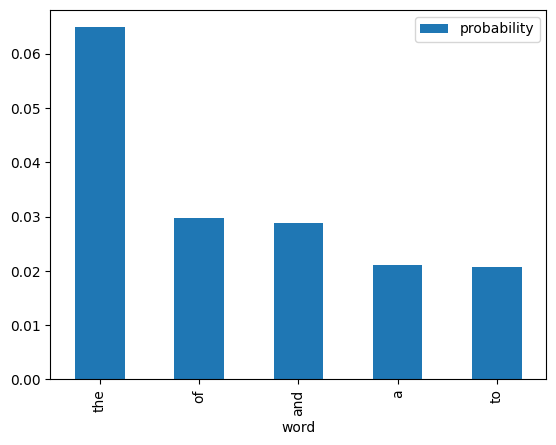

In [55]:
# Display probability distribution
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')

### Step 4.4: Replace Misspells with Correction

Write a function to replace misspelled words with the most probable corrections.

In [72]:
# Your code here to replace misspells
def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = [] # to store possible correction
    n_best = [] # store the best suggestions based on thier probs

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0: # if no correction are founf, it return the orihinal word
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word
# vocab = Set of Unique words in the shakespeare text
get_correct_word('eth', vocab, probs, 100)


'the'

### Step 5: Final Auto-Correction Function

Combine all parts into a final function that corrects sentences.

In [73]:
# Your code here for the final auto-correction function
def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

### Step 6: Demo

Apply your work to a sentence

In [77]:
autocorrect("he is goinng to visit his family", vocab, probs)

Input sentence :  he is goinng to visit his family
Wrong words :  ['goinng']
Output Sentence :  He is going to visit his family


In [59]:
autocorrect("life is a diink annd lve is a druug", vocab, probs)

Input sentence :  life is a diink annd lve is a druug
Wrong words :  ['diink', 'annd', 'lve', 'druug']
Output Sentence :  Life is a think and live is a drag


In [60]:
autocorrect("honsty is the best pooliccy", vocab, probs)

Input sentence :  honsty is the best pooliccy
Wrong words :  ['honsty', 'pooliccy']
Output Sentence :  Honest is the best policy
